In [1]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from dotenv import load_dotenv
load_dotenv()

False

### Toggle switch for GitHub
This notebook is auto generate. The next cell allows to create a static version of the notebook in order to have it available in GitHub view.

Please always call you figure using `interac_o_static(fig)`

In [2]:
def interac_o_static(fig):
    PLOTLY = os.getenv('PLOTLY')
    if PLOTLY == "interactive":
        return fig.show()
    else:
        return fig.show("png")

# Generate data
- For now the size of N is define as 70% of the full matrix size.  
  => if the matrix size is 200, so `N = 0.7 * 200` --> 140
  
- u is always equal to $4^{nbqubits}$

# Telemetry

In [3]:
tele_file = pd.read_feather("../resources/cmpl_matrix/telemetry_info.csv")
#list_bn = tele_file["N"].tolist()
#list_ln = tele_file["n"].tolist()
#list_rank = tele_file["rank"].tolist()
#list_over = tele_file["overlap"].tolist()
#list_nb_qubits = tele_file["nb_qubits"].tolist()
#list_np = tele_file["NP"].tolist()
#list_pourcent_sparcity = tele_file["pourcent_sparcity"].tolist()
#list_time_cmpl = tele_file["time_cmpl"].tolist()
#list_error_mse = tele_file["error_mse"].tolist()
#list_error_norm = tele_file["error_norm"].tolist()
#list_comment = tele_file["comment"].tolist()

### U vs time to solution
- Make multiplots with same number of qubits and differents matrix size (200/500)

Size of dataframe :  781


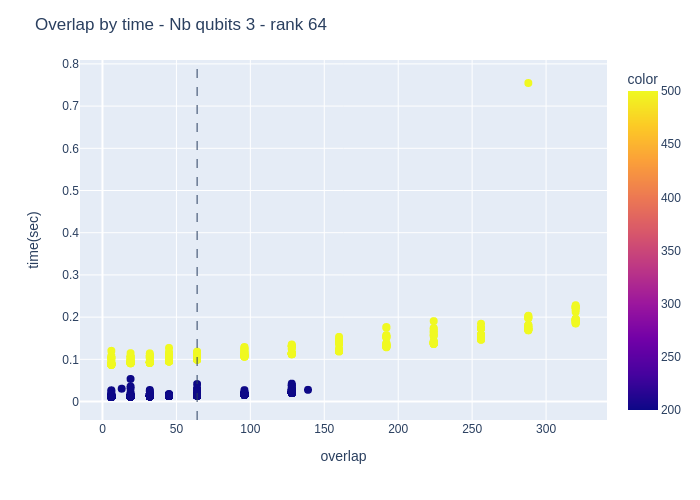

In [4]:
nb_qubit = 3

list_over = tele_file["overlap"].tolist()
list_time_cmpl = tele_file["time_cmpl"].tolist()
list_np = tele_file["NP"].tolist()
list_rank = tele_file["rank"].tolist()
list_nb_qubits = tele_file["nb_qubits"].tolist()

rank = min(list_rank)

print("Size of dataframe : ", len(list_over))

fig = px.scatter(x=list_over, y=list_time_cmpl, color=list_np)

fig.update_traces(marker=dict(size=8))

fig.update_layout(title_text='Overlap by time - Nb qubits ' + str(nb_qubit) + 
                  ' - rank ' + str(rank), xaxis_title="overlap", yaxis_title="time(sec)")
fig.add_vline(x=rank, fillcolor="green", line_width=1, line_dash="dash")

interac_o_static(fig)

### U vs error norm
- Make multiplots with same number of qubits and differents matrix size (200/500)

Size of dataframe :  781


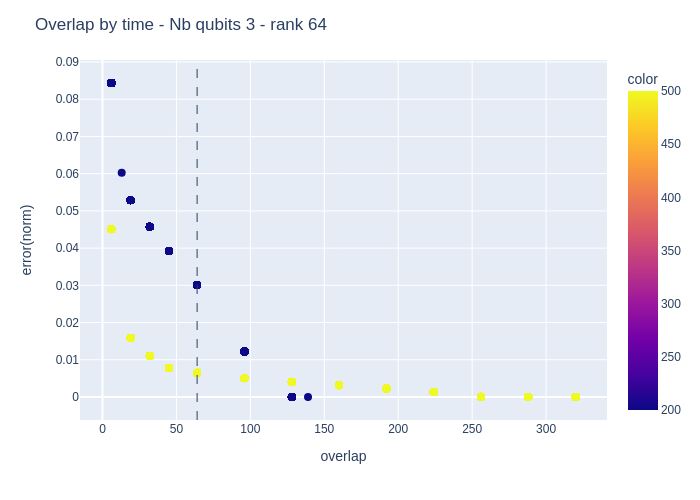

In [5]:
list_over = tele_file["overlap"].tolist()
list_error_norm = tele_file["error_norm"].tolist()
list_np = tele_file["NP"].tolist()
list_rank = tele_file["rank"].tolist()
list_nb_qubits = tele_file["nb_qubits"].tolist()

nb_qubit = 3
rank = min(list_rank)

print("Size of dataframe : ", len(list_over))

fig = px.scatter(x=list_over, y=list_error_norm, color=list_np)

fig.update_traces(marker=dict(size=8))

fig.update_layout(title_text='Overlap by time - Nb qubits ' + str(nb_qubit) + 
                  ' - rank ' + str(rank), xaxis_title="overlap", yaxis_title="error(norm)")
fig.add_vline(x=rank, fillcolor="green", line_width=1, line_dash="dash")

interac_o_static(fig)

# Annexes

## Acronyms & Terms
- `SUCCESS` : Completion successfully finished
- `mse` : Mean Square Error

## Full dataset
Uncomment the next cell or call it as you like

In [6]:
tele_file

,N,n,overlap,rank,nb_qubits,NP,pourcent_sparcity,time_cmpl,error_mse,error_norm,comment
0,140,60,64,64,3,200,0.2280,0.029705,2.274519e-04,3.010058e-02,SUCCESS
1,140,60,64,64,3,200,0.2280,0.014287,2.274519e-04,3.010058e-02,SUCCESS
2,140,60,45,64,3,200,0.2850,0.015650,3.862074e-04,3.922296e-02,SUCCESS
3,140,60,128,64,3,200,0.0360,0.037804,1.607522e-26,2.530513e-13,SUCCESS
4,140,60,139,64,3,200,0.0030,0.027717,2.001522e-28,2.823646e-14,SUCCESS
...,...,...,...,...,...,...,...,...,...,...,...
776,350,150,96,64,3,500,0.3048,0.115900,1.316357e-05,5.051774e-03,SUCCESS
777,350,150,128,64,3,500,0.2664,0.114343,8.571624e-06,4.076511e-03,SUCCESS
778,350,150,160,64,3,500,0.2280,0.122714,5.163536e-06,3.163958e-03,SUCCESS
779,350,150,192,64,3,500,0.1896,0.132926,2.729706e-06,2.300462e-03,SUCCESS
